<div>
<h1>Waves and Waveforms</h1>        
</div>

<br/>

<p>
Following Section 1.3.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we introdue in this notebook the concept of waveforms and their visualization.
</p> 

## Pressure&ndash;Time Plot

A **sound** is generated by a vibrating object such as the vocal cords of a singer, the string and soundboard of a violin, the diaphragm of a kettledrum, or the prongs of a tuning fork. These vibrations cause displacements and oscillations of air molecules, resulting in local regions of compression and rarefaction. The alternating pressure travels through the air as a **wave**, from its source to a listener or a microphone. At its destination, it
can then be perceived as sound by the human or converted into an electrical signal by a microphone. Graphically, the change in air pressure at a certain location can be represented by a **pressure&ndash;time plot**, also referred to as the **waveform** of the sound. The waveform shows the deviation of the air pressure from the average air pressure. 

<img src="../data/C1/FMP_C1_F17.png" width="500px" align="middle" alt="C1">

## Waveform of Sinusoid

If the points of high and low air pressure repeat in an alternating and regular fashion, the resulting waveform is called **periodic**. In this case, the **period** of the wave is defined as the time required to complete a cycle. The **frequency**, measured in **Hertz** (Hz), is the reciprocal of the period. The following figure shows a **sinusoid**, which is the simplest type of periodic waveform.

<img src="../data/C1/FMP_C1_F19.png" width="500px" align="middle" alt="C1">

In this example, the waveform has a period of a quarter second and hence a frequency of 4 Hz. A sinusoid is completely specified by its **frequency**, its **amplitude** (the peak deviation of the sinusoid from its mean), and its **phase** (determining where in its cycle the sinusoid is at time zero).

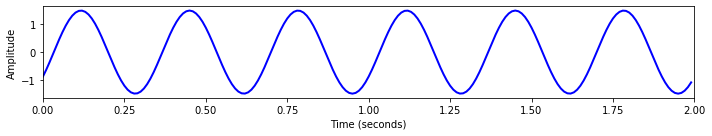

In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Fs = 100
duration = 2
amplitude = 1.5
phase = 0.1
frequency = 3

num_samples = int(Fs * duration)
t = np.arange(num_samples) / Fs
x = amplitude * np.sin(2 * np.pi * (frequency * t - phase))

plt.figure(figsize=(10, 2))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, duration])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()

## Waveform of Real Audio Example

As a real audio example, let us consider a piano recording of a C major scale.

<img src="../data/C1/FMP_C1_Scale-Cmajor.png" width="300px" alt="C-major scale" align="left">  

<br clear="all" />

<audio src="../data/C1/FMP_C1_Scale-Cmajor_Piano.mp3" type="audio/mpeg" controls="controls"></audio>

The following code generates a plot of a waveform representation.

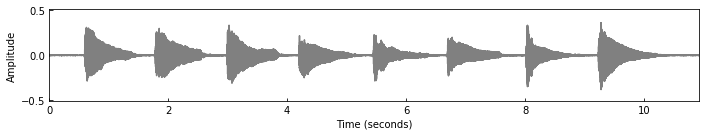

In [7]:
import librosa

Fs = 11025
x, Fs = librosa.load(os.path.join('..', 'data', 'C1', 'FMP_C1_Scale-Cmajor_Piano.wav'), sr=Fs)
t = np.arange(x.shape[0]) / Fs

plt.figure(figsize=(10, 2))
plt.plot(t, x, color='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t[0], t[-1]])
plt.ylim([-0.51, 0.51])
plt.tick_params(direction='in')
plt.tight_layout()

The following plot shows an enlargement of the section between $0.66$ and $0.71$ seconds. In this 50-ms section, one can count about 13 high-pressure points, which corresponds to $20\cdot13=260~\mathrm{Hz}$. Indeed, this is roughly the fundamental frequency ($261~\mathrm{Hz}$) of the first note $\mathrm{C4}$ begin played.

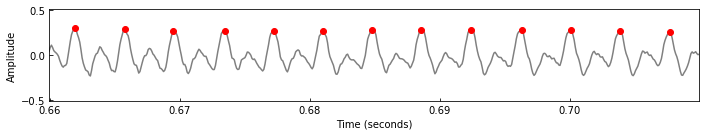

In [8]:
time_start = 0.66
time_end = 0.71
index_start = int(np.round(Fs*time_start))
index_end = int(np.round(Fs*time_end))
x_crop = x[index_start:index_end]
t_crop = t[index_start:index_end]

peaks = librosa.util.peak_pick(x_crop, 25, 25, 25, 25, 0.1, 10)

plt.figure(figsize=(10, 2))
plt.plot(t_crop, x_crop, color='gray')
plt.plot(t_crop[peaks],x_crop[peaks], 'ro')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim([t_crop[0], t_crop[-1]])
plt.ylim([-0.51, 0.51])
plt.tick_params(direction='in')
plt.tight_layout()

## Wave Propagation

In general terms, a (mechanical) **wave** can be described as an oscillation that travels through space, where energy is transferred from one point to another. When a wave travels through some medium, the substance of this medium is temporarily deformed. As described above, sound waves propagate via air molecules colliding with their neighbors. After air molecules collide, they bounce away from each other (a restoring force). This keeps the molecules from continuing to travel in the direction of the wave. Instead, they oscillate around almost fixed locations. A general wave can be **transverse** or **longitudinal**, depending on the direction of its oscillation. Transverse waves occur when a disturbance creates  oscillations perpendicular (at right angles) to the propagation (the direction of energy transfer). Longitudinal waves occur when the oscillations are parallel to the direction of propagation. According to this definition, a vibration in a string is an example of a transverse wave, whereas a sound wave has the form of a longitudinal wave. Also a combination of both longitudinal and transverse motions is possible as is the case with water waves, where the water particles travel in clockwise circles. The following videos illustrate the concept of the two types of waves. The code for generating the videos can be found in the next code cell.

<!--
<table style="border:none" align="center">
<tr style="border:none">
    <td align="center" style="min-width:50px; border:none; text-align:center" bgcolor="white"><strong>Transverse wave</strong></td>
    <td align="center" style="min-width:50px; border:none; text-align:center" bgcolor="white"><strong>Longitudinal wave</strong></td>
    <td align="center" style="min-width:50px; border:none; text-align:center" bgcolor="white"><strong>Combined wave</strong></td>
</tr>
<tr style="border:none">
    <td align="center" style="min-width:50px; border:none; text-align:center" bgcolor="white"><video src="../data/C1/FMP_C1_Wave_Transverse.mp4" type="movie.mp4" width="300" controls="controls"></video></td>
    <td align="center" style="min-width:50px; border:none; text-align:center" bgcolor="white"><video src="../data/C1/FMP_C1_Wave_Longitudinal.mp4" type="movie.mp4" width="300" controls="controls"></video></td>
    <td align="center" style="min-width:50px; border:none; text-align:center" bgcolor="white"><video src="../data/C1/FMP_C1_Wave_Combined.mp4" type="movie.mp4" width="300" controls="controls"></video></td>    
</tr>    
</table>
-->

<strong>Transverse wave</strong><br>
<video src="../data/C1/FMP_C1_Wave_Transverse.mp4" type="movie.mp4" width="300" controls="controls"></video>

<strong>Longitudinal wave</strong><br>
<video src="../data/C1/FMP_C1_Wave_Longitudinal.mp4" type="movie.mp4" width="300" controls="controls"></video>

<strong>Combined wave</strong><br>
<video src="../data/C1/FMP_C1_Wave_Combined.mp4" type="movie.mp4" width="300" controls="controls"></video>

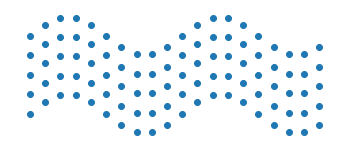

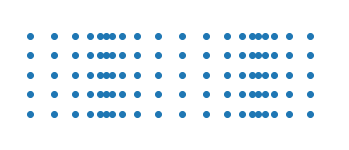

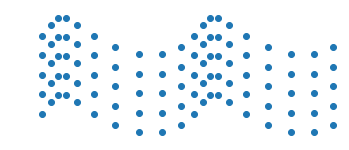

In [11]:
import matplotlib.animation as animation

def create_grid_pos(x_size=5, y_size=5):
    # x_size: number of grid points in horizontal direction
    # y_size: number of grid points in vertical direction
    # x_pos: horizontal coordinates of grid points
    # y_pos: vertical coordinates of grid points
    x_pos = np.zeros((y_size, x_size))
    y_pos = np.zeros((y_size, x_size))

    for x in range(x_size):
        y_pos[:,x] = np.arange(y_size)

    for y in range(y_size):
        x_pos[y,:] = np.arange(x_size)

    return x_pos, y_pos

def transverse_wave(x_positions, y_positions, frames_per_cycle=20, wave_len=10, amplitude=1, phase = 0, num_frames=100):
    # frames_per_cycle = number of frames per cycle
    # num_frames = frames to be generated
    k = 2 * np.pi / wave_len
    omega = 2 * np.pi / frames_per_cycle 
    x_frames = np.zeros((num_frames, x_positions.shape[0], x_positions.shape[1]))
    y_frames = np.zeros((num_frames, y_positions.shape[0], y_positions.shape[1]))

    for t in range(num_frames):
        x_frames[t,:,:] = x_positions
        for x in range(x_positions.shape[1]):
            y_frames[t,:,x] = y_positions[:,x] + amplitude * np.sin(k * x_positions[:,x] - omega * t + phase)

    return x_frames, y_frames

def longitudinal_wave(x_positions, y_positions, frames_per_cycle=20, wave_len=10,  amplitude=1, phase = 0, num_frames=100):
    # frames_per_cycle = number of frames per cycle
    # num_frames = frames to be generated
    k = 2 * np.pi / wave_len
    omega = 2 * np.pi / frames_per_cycle 
    x_frames = np.zeros((num_frames, x_positions.shape[0], x_positions.shape[1]))
    y_frames = np.zeros((num_frames, y_positions.shape[0], y_positions.shape[1]))

    for t in range(num_frames):
        y_frames[t,:,:] = y_positions
        for x in range(x_positions.shape[1]):
            x_frames[t,:,x] = x_positions[:,x] + amplitude * np.sin(k * x_positions[:,x] - omega * t + phase)

    return x_frames, y_frames

def combined_wave(x_positions, y_positions, frames_per_cycle=20, wave_len=[10,10], amplitude=[1,1], phase=[0,0], num_frames=100):
    x_trans, y_trans = transverse_wave(x_positions, y_positions, frames_per_cycle=frames_per_cycle,
                                       wave_len=wave_len[0], amplitude=amplitude[0], phase = phase[0], num_frames=num_frames)
    x_long, y_long = longitudinal_wave(x_positions, y_positions, frames_per_cycle=frames_per_cycle,
                                       wave_len=wave_len[1], amplitude=amplitude[1], phase = phase[1], num_frames=num_frames)
    x_comb = x_long
    y_comb = y_trans
    return x_comb, y_comb

x_size = 20
y_size = 5
x_pos, y_pos = create_grid_pos(x_size=x_size, y_size=y_size)

frames_per_cycle = 100
num_frames = 400
x_trans, y_trans = transverse_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                                   wave_len=10, amplitude=1, num_frames=num_frames )
x_long, y_long = longitudinal_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                                   wave_len=10, amplitude=1, num_frames=num_frames )
x_comb, y_comb = combined_wave(x_pos, y_pos, frames_per_cycle=frames_per_cycle,
                                   wave_len=[10,10], amplitude=[1,0.9], phase=[0,np.pi/2+0.5], num_frames=num_frames )


def update(frame_num, scat, x, y):
    idx = frame_num % x.shape[0]
    scat.set_offsets(np.column_stack((x[idx,:,:].flatten(), y[idx,:,:].flatten())))

    return scat


fig_trans, ax_trans = plt.subplots()
fig_trans.set_size_inches(6,2.5)
plt.axis('off')
ax_trans.set_xlim([-1.5, x_size + 0.5])
ax_trans.set_ylim([-1.5, y_size + 0.5])
scat_trans = ax_trans.scatter(x_trans[0,:,:], y_trans[0,:,:])

# interval between two video frames (given in ms)
frames_per_seconds = 20
interval = 1000/frames_per_seconds
ani_trans = animation.FuncAnimation(fig_trans, update, frames=num_frames,
                                    fargs=(scat_trans, x_trans, y_trans), interval=interval)
plt.show()
ani_trans.save(os.path.join('..', 'output', 'C1', 'FMP_C1_Wave_Transverse.mp4'))

fig_long, ax_long = plt.subplots()
fig_long.set_size_inches(6,2.5)
plt.axis('off')
ax_long.set_xlim([-1.5, x_size + 0.5])
ax_long.set_ylim([-1.5, y_size + 0.5])
scat_long = ax_long.scatter(x_long[0,:,:], y_long[0,:,:])

ani_long = animation.FuncAnimation(fig_long, update, frames=num_frames,
                                   fargs=(scat_long, x_long, y_long), interval=interval)
plt.show()
ani_long.save(os.path.join('..', 'output', 'C1', 'FMP_C1_Wave_Longitudinal.mp4'))

fig_comb, ax_comb = plt.subplots()
fig_comb.set_size_inches(6,2.5)
plt.axis('off')
ax_comb.set_xlim([-1.5, x_size + 0.5])
ax_comb.set_ylim([-1.5, y_size + 0.5])
scat_comb = ax_comb.scatter(x_comb[0,:,:], y_comb[0,:,:])

ani_comb = animation.FuncAnimation(fig_comb, update, frames=num_frames,
                                   fargs=(scat_comb, x_comb, y_comb), interval=interval)
plt.show()
ani_comb.save(os.path.join('..', 'output', 'C1', 'FMP_C1_Wave_Combined.mp4'))